<a href="https://colab.research.google.com/github/eakubrakova/TSU_python_course/blob/main/1_1_Ap_Rent_(stats)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1.1
Предварительный анализ данных по арендной плате квартир

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Импорт данных

In [ ]:
df = pd.read_csv("C:/Users/TVK/python/Ap_Rent.csv", sep=';')
df

,rent,s,floor,rooms,district,walls,furniture
0,15000,35.0,5,1,3,1,1
1,16500,31.0,2,1,2,0,1
2,18000,30.0,4,1,3,1,1
3,30000,55.0,1,2,3,1,1
...,...,...,...,...,...,...,...
126,28500,54.0,1,2,1,1,1
127,19500,54.0,3,2,2,0,1
128,10500,12.0,4,1,3,1,0
129,19500,68.0,4,2,2,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rent       130 non-null    int64  
 1   s          130 non-null    float64
 2   floor      130 non-null    int64  
 3   rooms      130 non-null    int64  
 4   district   130 non-null    int64  
 5   walls      130 non-null    int64  
 6   furniture  130 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 7.2 KB


## Гистограммы

<AxesSubplot:>

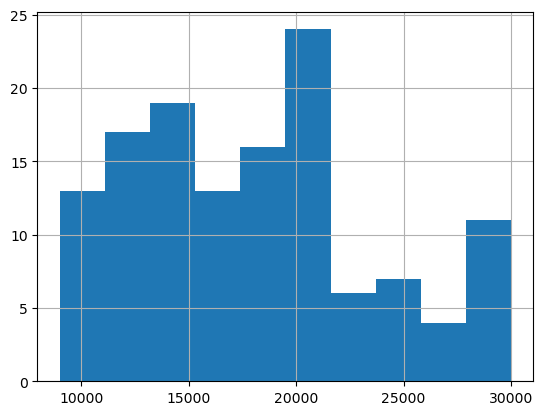

In [ ]:
df['rent'].hist()

<AxesSubplot:>

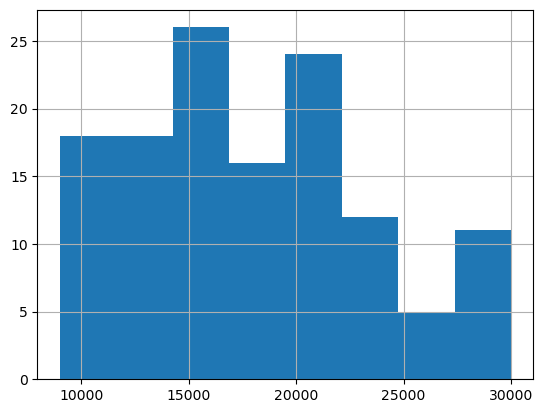

In [ ]:
df['rent'].hist(bins=8)

<AxesSubplot:>

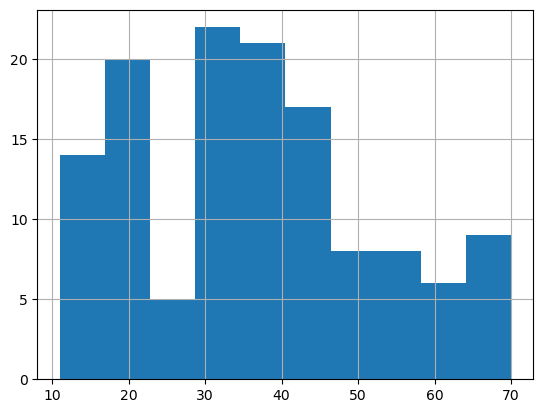

In [ ]:
df['s'].hist()

<AxesSubplot:>

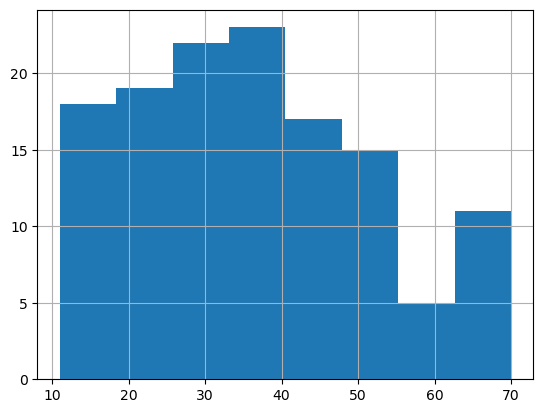

In [ ]:
df['s'].hist(bins=8)

## Описательные статистики

In [ ]:
df.drop(['walls','furniture','district'],axis=1).describe()

,rent,s,floor,rooms
count,130.000000,130.000000,130.000000,130.000000
mean,17890.384615,36.439231,4.153846,1.376923
std,5608.686840,15.753831,2.680569,0.613358
min,9000.000000,11.000000,1.000000,1.000000
25%,13500.000000,21.250000,2.000000,1.000000
50%,18000.000000,36.000000,3.000000,1.000000
75%,21000.000000,45.000000,5.000000,2.000000
max,30000.000000,70.000000,12.000000,3.000000


In [ ]:
df[['rent','s']].mean() # среднее

rent    17890.384615
s          36.439231
dtype: float64

In [ ]:
df[['rent','s']].std()  # средне квадратическое отклонение

rent    5608.686840
s         15.753831
dtype: float64

In [ ]:
df[['rent','s']].skew() # коэффициент асимметрии

rent    0.536873
s       0.328439
dtype: float64

In [ ]:
df[['rent','s']].kurtosis() # коэффициент эксцесса

rent   -0.350727
s      -0.706654
dtype: float64

In [ ]:
df['floor'].value_counts()

3     28
1     21
2     17
4     17
      ..
6      5
9      4
12     4
10     1
Name: floor, Length: 11, dtype: int64

In [ ]:
df['rooms'].value_counts()

1    90
2    31
3     9
Name: rooms, dtype: int64

In [ ]:
df['walls'].value_counts()

1    80
0    50
Name: walls, dtype: int64

In [ ]:
df['district'].value_counts()

3    48
2    44
1    38
Name: district, dtype: int64

In [ ]:
df['furniture'].value_counts()

1    109
0     21
Name: furniture, dtype: int64

## Проверка нормальности по критерию Шапиро-Уилка

In [ ]:
stats.shapiro(df['rent'])

ShapiroResult(statistic=0.9490651488304138, pvalue=9.61164478212595e-05)

In [ ]:
stats.shapiro(df['s'])

ShapiroResult(statistic=0.9606573581695557, pvalue=0.0008220362360589206)

## Связь целевого показателя rent и категориальных факторов

In [ ]:
df.groupby('walls')[['rent']].mean()

,rent
walls,
0,17790.000
1,17953.125


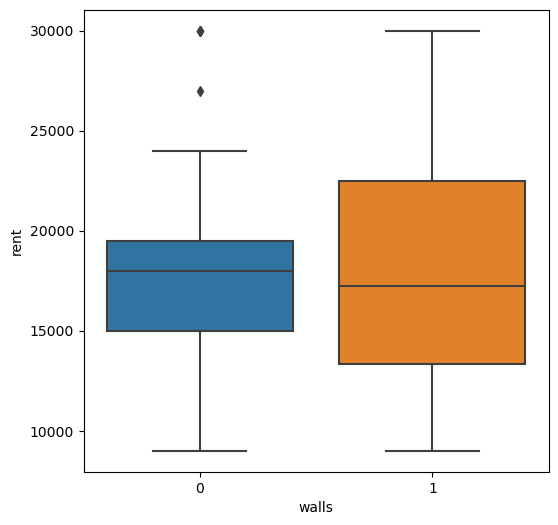

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='rent', data=df)

In [ ]:
df_w0 = df[df['walls']==0]
df_w1 = df[df['walls']==1]
print(stats.shapiro(df_w0['rent']))
print(stats.shapiro(df_w1['rent']))

ShapiroResult(statistic=0.933836817741394, pvalue=0.007742355111986399)
ShapiroResult(statistic=0.9406318664550781, pvalue=0.0010412109550088644)


In [ ]:
df.groupby('furniture')[['rent']].mean()

,rent
furniture,
0,12535.714286
1,18922.018349


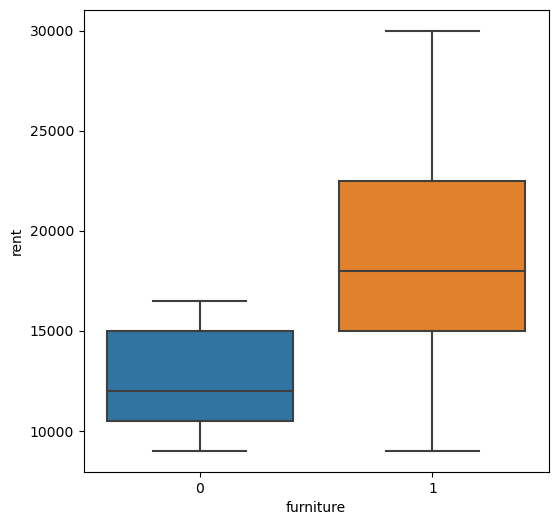

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='rent', data=df)

In [ ]:
df_f0 = df[df['furniture']==0]
df_f1 = df[df['furniture']==1]
print(stats.shapiro(df_f0['rent']))
print(stats.shapiro(df_f1['rent']))

ShapiroResult(statistic=0.8862565159797668, pvalue=0.019116604700684547)
ShapiroResult(statistic=0.9571584463119507, pvalue=0.001457675127312541)


In [ ]:
df.groupby('district')[['rent']].mean()

,rent
district,
1,19894.736842
2,15375.000000
3,18609.375000


In [ ]:
df.groupby('district')[['rent']].count()

,rent
district,
1,38
2,44
3,48


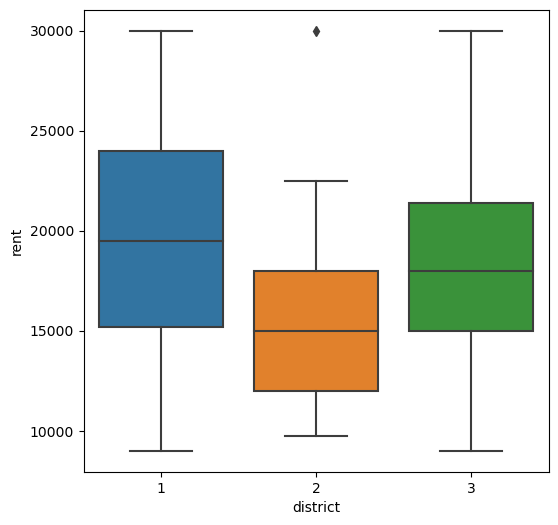

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='rent', data=df)

In [ ]:
df.loc[(df['rent'] == 30000) & (df['district'] == 2)]

,rent,s,floor,rooms,district,walls,furniture
37,30000,64.0,3,3,2,0,1


In [ ]:
df=df.drop(df.index[[37]])

In [ ]:
df_d1=np.array(df[df['district']==1]['rent'])
df_d2=np.array(df[df['district']==2]['rent'])
df_d3=np.array(df[df['district']==3]['rent'])

In [ ]:
print(stats.shapiro(df_d1))
print(stats.shapiro(df_d2))
print(stats.shapiro(df_d3))

ShapiroResult(statistic=0.9700818657875061, pvalue=0.3938768208026886)
ShapiroResult(statistic=0.9333935976028442, pvalue=0.015224754810333252)
ShapiroResult(statistic=0.9480535984039307, pvalue=0.03346915543079376)


## Связь количественного показателя s (площадь) и категориальных факторов

In [ ]:
df.groupby('walls')[['s']].mean()

,s
walls,
0,39.042857
1,34.500000


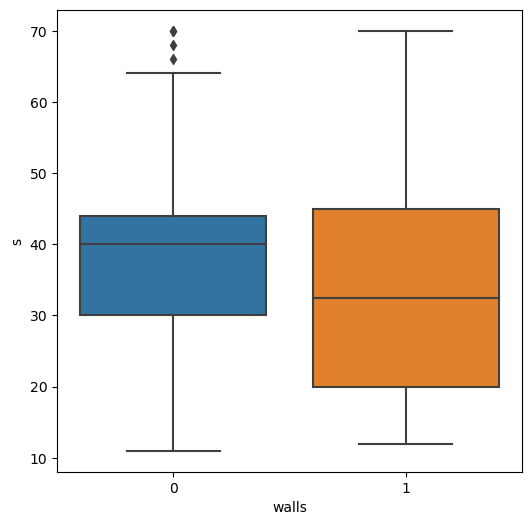

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='walls', y='s', data=df)

In [ ]:
print(stats.shapiro(df_w0['s']))
print(stats.shapiro(df_w1['s']))

ShapiroResult(statistic=0.9625374674797058, pvalue=0.11355537921190262)
ShapiroResult(statistic=0.9499643445014954, pvalue=0.0034307457972317934)


In [ ]:
df.groupby('furniture')[['s']].mean()

,s
furniture,
0,21.904762
1,39.010185


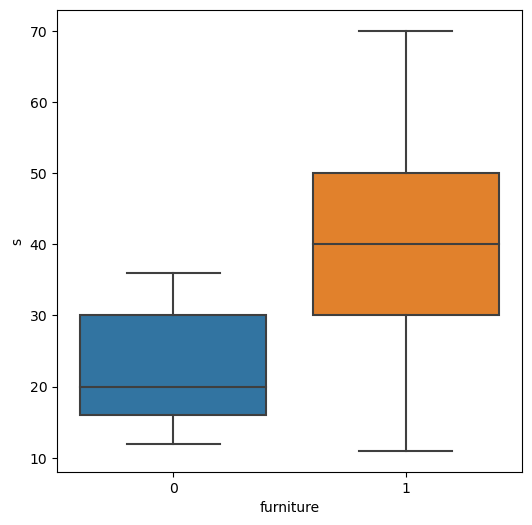

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='furniture', y='s', data=df)

In [ ]:
df.groupby('district')[['s']].mean()

,s
district,
1,37.078947
2,32.711628
3,38.697917


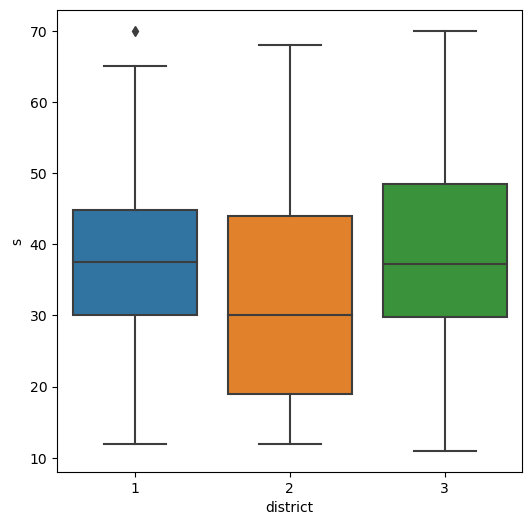

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='district', y='s', data=df)

In [ ]:
df_s_d1=np.array(df[df['district']==1]['s'])
df_s_d2=np.array(df[df['district']==2]['s'])
df_s_d3=np.array(df[df['district']==3]['s'])

In [ ]:
print(stats.shapiro(df_s_d1))
print(stats.shapiro(df_s_d2))
print(stats.shapiro(df_s_d3))

ShapiroResult(statistic=0.9786481857299805, pvalue=0.6694725155830383)
ShapiroResult(statistic=0.9183208346366882, pvalue=0.004724521655589342)
ShapiroResult(statistic=0.9602149128913879, pvalue=0.10299959033727646)


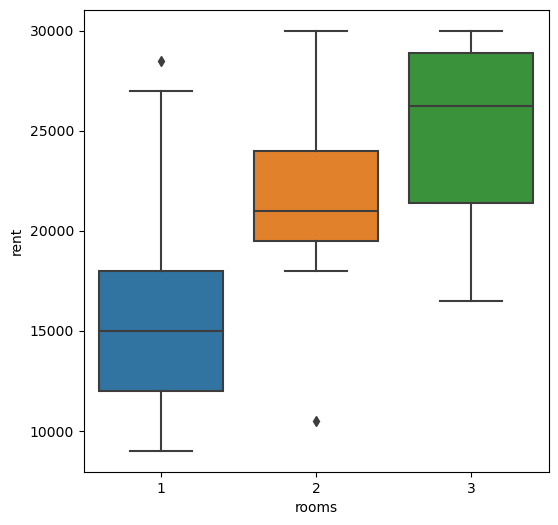

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='rooms', y='rent', data=df)

## Связь категориальных признаков друг с другом

In [ ]:
WF=pd.crosstab(df['walls'],df['furniture']); WF

furniture,0,1
walls,,
0,7,42
1,14,66


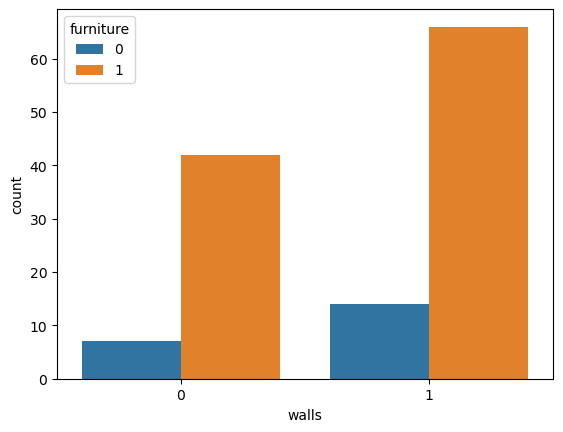

In [ ]:
sns.countplot(x=df['walls'], hue=df['furniture']);

In [ ]:
WD=pd.crosstab(df['walls'],df['district']); WD

district,1,2,3
walls,,,
0,9,23,17
1,29,20,31


<AxesSubplot:xlabel='district', ylabel='count'>

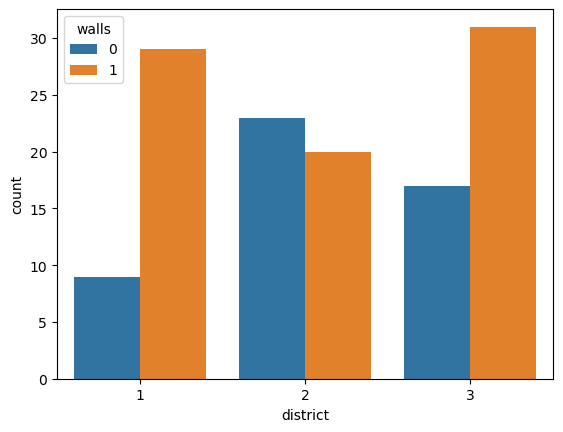

In [ ]:
sns.countplot(x=df['district'], hue=df['walls'])

## Связь целевого показателя rent с количественным показателем площади

<AxesSubplot:xlabel='s', ylabel='rent'>

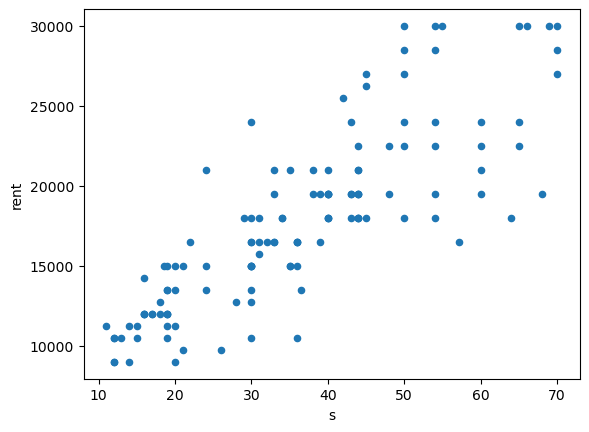

In [ ]:
df.plot('s','rent',kind="scatter")